# RDBMS - SQL 2

## Topics
* Relational Algebra and SQL (recap)
* Subqueries
* Aggregate Functions
* Set Operations with SQL
* `NULL` values
* Joins
* Subqueries vs Joins

## Relational Algebra and SQL (recap)

**What are the relational algebra that we have learnt?** <br>
From Set Theory:
* union ($\cup$)
* intersection ($\cap$)
* difference ($-$)
* cartesian product ($\times$)

Operations on Relations:
* selection ($\sigma_{cond} (R)$)
* Projection ($\pi_{A} (R)$)
* rename ($\rho_{R_{new}} (R_{old})$)
* join ($R \Join_{A \theta B} S$), natural join ($R \Join S$)
* division ($R \div S$)
* full outer join ($R$ &#10199; $S$), left outer join ($R$ &#10197; $S$), right outer join ($R$ &#10198; $S$)

**What have we learnt about SQL?** <br>
* SQL is more of a data sub-language
* Data definition Language (DDL): CREATE, ALTER, DROP
 * it has datatypes
* Data manipulation language (DML): INSERT, DELETE, UPDATE, SELECT

**Syntax for DDL**
```sql
/*Create statements*/
CREATE DATABASE <database_name>;
CREATE TABLE <table_name>(<fields_1> <datatype> <constraints>, ..., <fields_n> <datatype> <constraints>, 
                          <table_constraints_1>,
                          <table_constraints_2>,
                          ...,
                          <table_constraints_n>);

/*Drop statements*/
DROP DATABASE <database_name>;
DROP TABLE <table_name>;

/*Alter statements*/
ALTER TABLE <table_name> <alter_specification>;
ALTER TABLE IF EXISTS student DROP COLUMN IF EXISTS age;
```

We have also seen some constraints that are generally applied to tables: **Primary Key** and **Foreign Key**.<br>
There can also be constraints applied to the fields of the tables: **AUTO_INCREMENT**, **NOT NULL**, etc.

**Syntax for DML**
```sql
/*Insert statements*/
INSERT INTO <table_name> (column_name, ...) VALUES (value1, ...);
INSERT INTO <table_name> (column_name, ...) SELECT <field_1>, <table_field_1>, ..., <field_n> FROM <table_name>
    WHERE <condition>;

/*Update statement*/
UPDATE <table_name> SET <column_name> = value, ... WHERE <condition>;

/*Delete statements*/
DELETE FROM <table_name>;
DELETE FROM <table_name> WHERE <condition>;

/*Select statements*/
SELECT <column_name_1>,..., <column_name_n> FROM <table_name> WHERE <condition>;
SELECT * FROM <table_name>;
SELECT <column_name> AS <alias> FROM <table_name> WHERE <condition>;
```

**How does relation algebra fit with SQL?**<br>
Let's take a look at some of the combinations:

From *Operations on relations*, we have the <u>*projection*</u> ($\pi$) and <u>*selection*</u> ($\sigma$) operators which together will translate to the `SELECT` statements with the `WHERE` conditions.

Selecting values from a **single table**.
```sql
SELECT <col_1>, ..., <col_n> FROM <table_name> WHERE <condition>;
```
Relational Algebra<br>
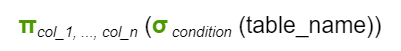

Selecting values from **multiple tables**, we would use the <u>*cartesian product*</u> ($\times$).
```sql
SELECT <col_1>, ..., <col_n> FROM <table_name_1>, <table_name_2> WHERE <condition>;
```

Relational Algebra<br>
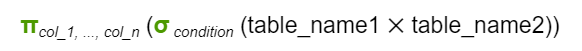

Using **alias** in SQL statements.
```sql
SELECT <col_1> AS <alias_1>, ..., <col_n> AS <alias_n> FROM <table_name_1> <alias_1>, ..., 
       <table_name_n> <alias_n> WHERE <condition>;
```

Relational Algebra<br>
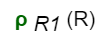

---

### Exercise

Given the following database schema, answer the following questions.
```
Suppliers(sID, sName, address)       PK: sID
Parts(pID, pName, colour)            PK: pID
Catalog(sID, pID, price)             PK: sID, pID
                                        FK: sID (Suppliers), pID (Parts)
```

**Qn 1)** Using relational algebra, find the names of all red parts.<br>
**Qn 2)** Using relational algebra, find all prices for parts that are red or green. (A part may have different prices from different manufacturers.) <br>
**Qn 3)** Using relational algebra, find the names of all suppliers who supply a part that is red or green.

---
## For this chapter, we will be using the Schema below

### University Schema

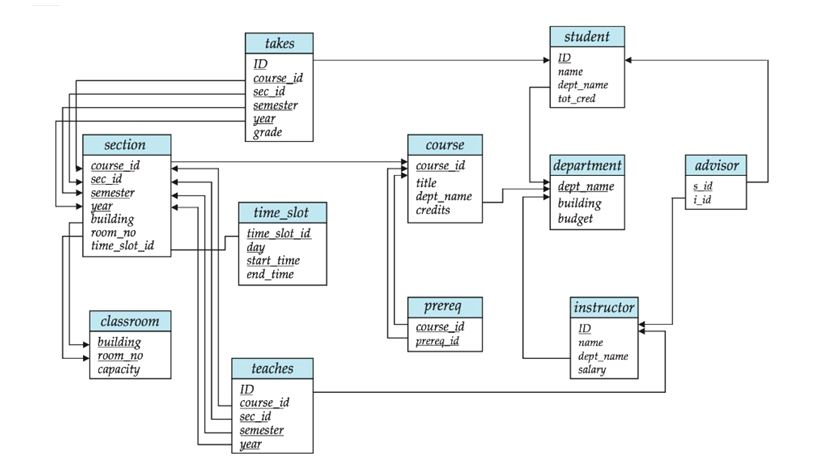

**Classroom**(<u>building</u>, <u>room_number</u>, capacity) <br>
**Department**(<u>dept_name</u>, building, budget) <br>
**Course**(<u>course_id</u>, title, dept_name, credits) <br>
**Instructor**(<u>ID</u>, name, dept_name, salary) <br>
**Section**(<u>course_id</u>, <u>sec_id</u>, <u>semester</u>, <u>year</u>, building, room_number, time_slot_id) <br>
**Teaches**(<u>ID</u>, <u>course_id</u>, <u>sec_id</u>, <u>semester</u>, <u>year</u>) <br>
**Student**(<u>ID</u>, name, dept_name, tot_cred) <br>
**Takes**(<u>ID</u>, <u>course_id</u>, <u>sec_id</u>, <u>semester</u>, <u>year</u>, grade) <br>
**Advisors**(<u>s_ID</u>, <u>i_ID</u>) <br>
**Time_slot**(<u>time_slot_id</u>, <u>day</u>, <u>start_time</u>, end_time) <br>
**Prereq**(<u>course_id</u>, <u>prereq_id</u>) <br>

---
## Subqueries

A mechanism of SQL to nest a subquery within another query. Subqueries can be used to return either a **scalar (single) value** or a **row set**. There are several places where a subquery can be nested, in this section we will learn about some cases of constructing subqueries that are nested only in the `WHERE` clause. However, if you would like to further your knowledge about subqueries, you can read up more about subqueries being nested in the `WHERE` clause,  `FROM` clause and scalar subqueries where it can appear wherever an expression returning a value can occur.

**Important Note** most subqueries can also be done via the SQL Set Operations (which we will see later) but choosing which method to use (again) boils down to SQL statement readability and whether or not the RDBMS has the operators implemented.


The general syntax is:
```sql
SELECT <column_name_1>,..., <column_name_n> FROM <table_name> 
WHERE <condition> (SELECT <column_name_1>,..., <column_name_n> 
                   FROM <table_name> WHERE <condition>);
```

**Example**<br>
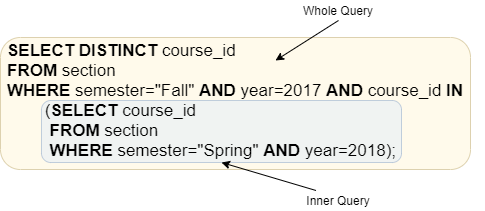

`WHERE` clause subqueries are typically used to perform some tests like:
* checking if an element is in a set
* checking if the result set is a subset of another set
* checking if a set is empty
* and more...

### Checking if an element is in a set

This operation is called the **Set Membership** and it uses the operators `IN` and `NOT IN`. 

**Example 1 - Testing for the presence of a set result**<br>

**Requirement:** <br>
Finding all courses (without duplicates) that were taught in <u>Fall 2017</u> that **are also** being taught in <u>Spring 2018</u>.

**Analysis** <br>
We want courses taught in Fall 2017 as our **main set results** and we also want to check which of these tuples are also courses taught in Spring 2018. This will lead us to use the `IN` operator for our subquery but before that, let's see what is the data in the `section` table.

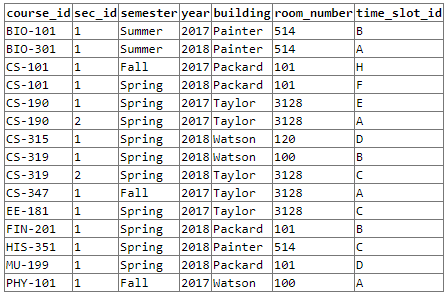

```sql
SELECT DISTINCT course_id 
FROM section 
WHERE semester="Fall" AND year=2017 AND course_id IN 
    (SELECT course_id 
     FROM section 
     WHERE semester="Spring" AND year=2018);
```

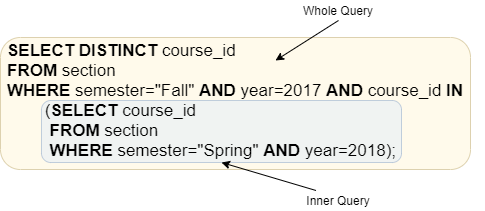

Let's see the output from both the queries separately first.

| Fall 2017 | Spring 2018 |
|:---|:---|
| 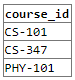 | 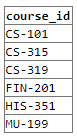 |

Now that we have both result sets, we can see that only the course `CS-101` is common. Therefore the result of the original query is

| course_id |
|:---|
| CS-101 |

**Example 2 - Testing for absence of a set result**

**Requirement:** <br>
Find all student IDs and student names who have never took a course taught by the instructor <u>Katz</u>.

**Analysis** <br>
We want all the student IDs and names as our **main set results** and we want to sieve out the student IDs of those who **have been taught** by the instructor Katz. This will lead us to use the `NOT IN` operator for our subquery.

```sql
SELECT DISTINCT student.ID, student.name 
FROM student 
WHERE student.ID NOT IN 
    (SELECT takes.ID 
     FROM teaches,takes,instructor
     WHERE takes.course_id = teaches.course_id AND
     teaches.ID = instructor.ID AND
     instructor.name = "Katz");
```

Output:<br>
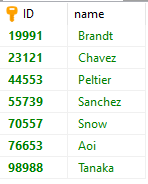

**Example 3 - Subqueries using values from the outer query**

**Requirement:** <br>
Find all student IDs and student names who have not taken any courses yet.

**Analysis** <br>
We want all the student IDs and names as our **main set results** and we want to sieve out the student IDs who **have already taken** some courses. This would mean that we use the `NOT IN` operator for our subquery and also our subquery uses the values from the outer query therefore this is called a **correlated subquery**.

```sql
SELECT s.ID, s.name 
FROM student AS s 
WHERE s.ID NOT IN 
    (SELECT t.ID FROM takes AS t WHERE t.ID=s.ID);
```

### Checking if the result set is a subset of another set

This operation is called the **Set Comparison** and it uses the comparison operators (`<`,`>`,`<=`,`>=`,`=`,`<> or !=`) along with the keywords `SOME` and `ALL`.

**Example 1 - Comparing at least one result set tuple**

**Requirement:**<br>
Find the names of all instructors whose salary is greater than **at least one** instructor in the Biology department.

**Analysis**<br>
We want the names of all the instructors as our **main set results** but the instructors must have a salary more than **any of the instructors** from the Biology dept. Because we are only using the a subset of the instructor's salary (from the Biology department), we use the `> SOME` operation.

Let's see all the data from the instructor table:<br>
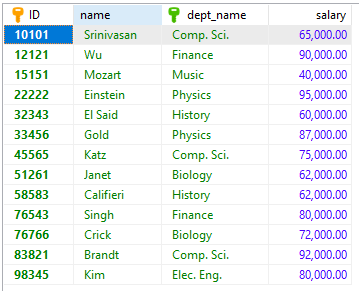

If we were to use a normal SQL statement, it would be
```sql
SELECT DISTINCT T.name
FROM instructor AS T, instructor AS S
WHERE T.salary > S.salary AND S.dept name = 'Biology';
```
but since we are learning subqueries,  it would look like
```sql
SELECT name 
FROM instructor
WHERE salary > SOME
    (SELECT salary FROM instructor 
     WHERE dept_name="Biology");
```

Output:<br>
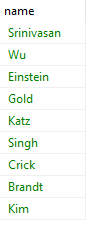

**How do we read this subquery?** <br>
The subquery in this query will return all the salary values of all the instructors in the Biology department. The `> SOME` comparison in the `WHERE` clause of the outer `SELECT` is true if the salary value of the tuple is greater than **at least one** member of the set of all salary values for instructors in the Biology department.

**Example 2 - Comparing all result set tuples**

**Requirement:**<br>
Find the names of all instructors whose salary is greater than **each of the** instructors in the Biology department. 

**Analysis**<br>
We want the names of all the instructors as our **main set results** but the instructors must have a salary more than **all of the instructors** from the Biology dept. Because we are using all the result sets of the instructor's salary (from the Biology department), we use the `> ALL` operation.

The SQL statement would look like
```sql
SELECT name 
FROM instructor
WHERE salary > ALL
    (SELECT salary FROM instructor 
     WHERE dept_name="Biology");
```

Output:<br>
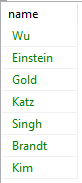

**How do we read this subquery?** <br>
The subquery in this query will return all the salary values of all the instructors in the Biology department. The `> ALL` comparison in the `WHERE` clause of the outer `SELECT` is true if the salary value of the tuple is greater than **all** members of the set of all salary values for instructors in the Biology department.

### Checking if a set is empty

This operation is used to check if the subquery has any tuples in its result set with the `EXISTS` or `NOT EXISTS` keyword. 

**Example 1 - Testing for tuples in the subquery**<br>
We will revisit the subquery used in the earlier section where we wanted to find out all the courses taught in both Fall 2017 and Spring 2018.

Using the `IN` operator:
```sql
SELECT DISTINCT course_id 
FROM section 
WHERE semester="Fall" AND year=2017 AND course_id IN 
    (SELECT course_id 
     FROM section 
     WHERE semester="Spring" AND year=2018);
```

We are going to rewrite this using the `EXISTS` keyword:
```sql
SELECT course_id
FROM section AS sect
WHERE semester = "Fall" AND year=2017 AND EXISTS 
    (SELECT * FROM section AS T
     WHERE semester = "Spring" AND year=2018 AND sect.course_id=T.course_id);
```

Notice how the SQL statements change when using the `IN` operator vs the the `EXISTS` keyword. The subquery for the `IN` operator returns an unrelated dataset from the outer query but the `EXISTS` keyword subquery relies on the a relation linking the outer query with its subquery.

**Example 2 - Testing for nonexistent tuples in the subquery**

We will revisit the subquery used in the earlier section where we wanted to find all students (ID and name) who have not been taught by instructor Katz.

Using the `NOT IN` operator:
```sql
SELECT DISTINCT student.ID, student.name 
FROM student 
WHERE student.ID NOT IN 
    (SELECT takes.ID 
     FROM teaches,takes,instructor
     WHERE takes.course_id = teaches.course_id AND
     teaches.ID = instructor.ID AND
     instructor.name = "Katz");
```

We are going to rewrite this using the `NOT EXISTS` keyword:
```sql
SELECT ID, name FROM student
WHERE NOT EXISTS 
    (SELECT * FROM teaches,takes,instructor
     WHERE takes.ID = student.ID AND
     takes.course_id = teaches.course_id AND
     teaches.ID = instructor.ID AND
     instructor.name = "Katz");
```
Output:<br>
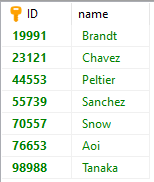

**What is the difference between `IN` and `EXISTS`?**<br>
It is mainly used for optimization purposes and handling of `NULL` values.

The only time (for MariaDB) where it is better to convert statements using `EXISTS` into `IN` statements are:
1. Trivially correlated `EXISTS` subqueries
2. Semi-join `EXISTS`

**Trivially correlated `EXISTS` subqueries**<br>
These SQL statements have only a single correlation with the outer query and they have the form:
```sql
EXISTS (SELECT ...  FROM ... WHERE outer_col= inner_col AND inner_where)
```
where the `outer_col` is the only place where the subquery refers to the outside fields. In this case, the subquery can be rewritten into an uncorrelated `IN` subquery.

**Semi-join `EXISTS`**<br>
These SQL statements have the `EXISTS` subquery is an `AND` part of the `WHERE` clause. They have the form:
```sql
SELECT ... FROM outer_tables WHERE EXISTS (SELECT ...) AND ...
```
for this, we use the execution strategies of semi-join optimizers.

**Handling of `NULL` values**<br>
For `IN` statements to handle `NULL` values, the semantics is very complicated but the `NOT EXISTS` is straight forward by adding the `IS NOT NULL` before the subquery when required.

**In theory, the difference can be summed up in the table below.**

| `EXISTS` | `IN` |
|:---|:---|
| Cannot compare the values between the sub-query query and parent query. | Can compare the values between sub-query and parent queries. |
| The output of `EXISTS` can be either `FALSE` or `TRUE` | The output of `IN` can be `TRUE` or `NULL` or `FALSE` |
| Is used to determine if any values are returned or not. | Used as a multiple `OR` operator. |
| If the subquery result is large, then `EXISTS` is faster than `IN`. | If the subquery result is less, then `IN` is faster than `EXISTS`. |
| Once the single positive condition is met in the `EXISTS` condition then the SQL Engine will stop the process. | In the `IN` condition SQL Engine compares all the values. |

---
## Aggregate Functions
These are functions that takes a collection of values as inputs and return a single value. We will learn the 5 standard built-in aggregate functions (MariaDB has more than these 5):

| | Argument Type | Return Type | Description |
|:---|:---|:---|:---|
| `COUNT` | Any (can even be \*) | Numeric | Number of occurrences |
| `SUM` | Numeric | Numeric | Sum of inputs |
| `AVG` | Numeric | Numeric | Average of inputs |
| `MAX` | Characters or Numeric | Same as input datatype | Maximum Value |
| `MIN` | Characters or Numeric | Same as input datatype | Minimum Value |

**Example: Aggregate Functions in the columns part of SQL statements**
```sql
/* calculating the average salary of instructors from the Comp Sci dept */
SELECT AVG(salary) FROM instructor WHERE dept_name="Comp. Sci.";

/* listing the minimum grade of each student */
SELECT ID, MIN(grade) FROM takes GROUP BY ID;
```

**Example: Aggregate Functions in subqueries (`FROM` clause subquery)**
```sql
/* Find the average instructor's salaries of those departments where the average 
   salary is greater than 42,000. */
SELECT dept_name, avg_salary
FROM (SELECT dept_name, AVG(salary) AS avg_salary
  FROM instructor
  GROUP BY dept_name) dept_avg
WHERE avg_salary > 42000;
```

Notice how the aggregate functions are mostly in the columns part of the SQL statements regardless of subqueries? Wouldn't it be good if we could apply it to groups constructed by the `GROUP BY` clause instead of just tuples. To do that, we can use the `HAVING` clause. **Note** that the `HAVING` clause have to be used with the `GROUP BY` clause otherwise it will be an error.

**Example: Aggregate Functions on groups of data**<br>
Find the average total credits (*tot_cred*) of all students who have enrolled in a course section offered in the year 2017, if the course section has at least 2 students.

```sql
SELECT course_id, semester, year, sec_id, avg (tot_cred)
FROM student, takes
WHERE student.ID= takes.ID AND year = 2017
GROUP BY course_id, semester, year, sec_id
HAVING COUNT(student.ID) >= 2;
```

Output:<br>
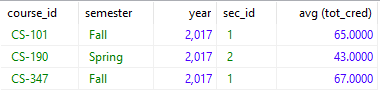

---
## Set Operations with SQL

Even with SQL, there are set operations that we can use that corresponds to the set theory operations that we have learnt in relational algebra. The set operations that MariaDB has are **union**, **intersect** and **except**. Each of these operators can be combined with other keywords like `ALL` to produce different outputs. Bear in mind that these set operations can also be done with **several `JOIN`s** but it **may not be as readable** as using the set operations.

To use these operations, we place them between 2 `SELECT` statements like so
```sql
/* syntax */
SELECT <col_1>, ..., <col_n> FROM <table_name> WHERE <condition>
<set_operation>
SELECT <col_1>, ..., <col_n> FROM <table_name> WHERE <condition>;

/* Example - union all */
SELECT <col_1>, ..., <col_n> FROM <table_name> WHERE <condition>
UNION ALL
SELECT <col_1>, ..., <col_n> FROM <table_name> WHERE <condition>;
```

### Union
The `UNION` and `UNION ALL` set operators add the result of two or more result sets. However, the difference between them is:
* **`UNION`** - automatically eliminates duplicates
* **`UNION ALL`** - retains all duplicates

**Example - `UNION`**<br>
Let's say that we want to find out all the courses being taught in <u>Fall 2017</u> and <u>Spring 2018</u>. This information is available from the `section` table.

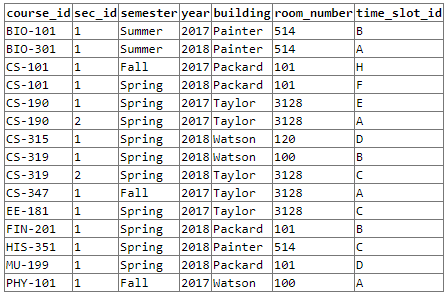

We can construct 2 separate queries then combine their results
```sql
select course_id from section where semester = "Fall" and year= 2017
UNION
select course_id from section where semester = "Spring" and year= 2018;
```
Depending on whether or not the `UNION` operator is used with the `ALL` keyword, the output differs:

| `UNION` | `UNION ALL` |
|:---:|:---:|
| 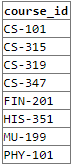 | 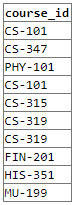 |

### Intersect & Except

These 2 set operations are available since **MariaDB Server 10.3** largely to enhance compatibility with Oracle.<br>
* **`INTERSECT`** operator will return all items that exist in two or more sets, or in SQL terms, all rows that exist in two result sets.
* **`EXCEPT`** operator, will return the items that are in one of the sets, but not in the other.

Just like in the `UNION` operation, the `ALL` keyword can also be used with the `INTERSECT` and `EXCEPT` set operations (available from **MariaDB 10.5 onwards**).

**Example - `INTERSECT`**<br>
Let's say that we want to find out all the courses being taught in both <u>Fall 2017</u> and <u>Spring 2018</u>.

We can construct 2 separate queries then find their cross section of their results
```sql
select course_id from section where semester = "Fall" and year= 2017
INTERSECT
select course_id from section where semester = "Spring" and year= 2018;
```

Output:<br>
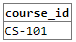


**Example - `EXCEPT`**<br>
Let's say that we want to find out all the courses being taught in <u>Fall 2017</u> but not in <u>Spring 2018</u>.

We can construct 2 separate queries then find their set difference of their results
```sql
select course_id from section where semester = "Fall" and year= 2017
EXCEPT
select course_id from section where semester = "Spring" and year= 2018;
```

Output:<br>
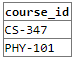

---
## `NULL` Values

As data can have `NULL` values, we need to learn how to handle them in SQL as well. `NULL` values have always posed a special problem for relational operations such as arithmetic operations, comparison operations and set operations. 

Take the arithmetic operation for example, if a query has an expression `r.A + 5`, and `r.A` is `NULL` for a particular tuple, then the expression result must also be `NULL` for that tuple. Comparisons pose even more of a headache! For example, the expression `1 < NULL` has not much meaning when we have no idea what the value of `NULL` represents. SQL therefore treats as **unknown** the result of any comparison involving a `NULL` value.

Since we need to address this `NULL` and *unknown* issue especially in the `WHERE` clause because that is where we do our Boolean operations (`AND`, `OR` and `NOT`) on the results of the comparisons. Therefore the Boolean operations have been extended to deal with this issue, the result is the following rules:

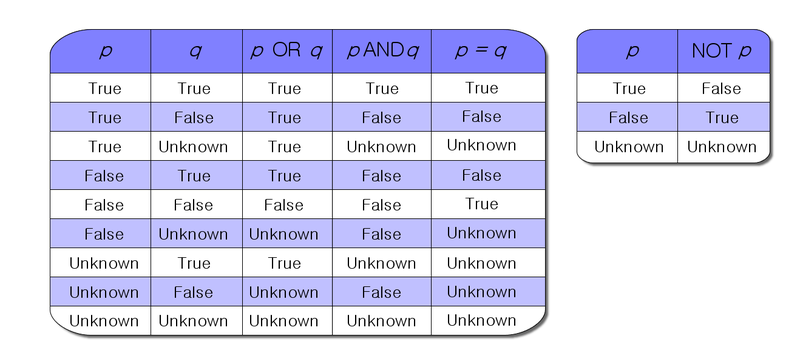

So which keyword can we use in the `WHERE` clause to handle this thing? We can use the `IS NULL` or the `IS NOT NULL` keywords.

**Example**<br>
If we have scenarios like an instructor has not have their salary negotiated yet or a student has just started their course and no grade has been awarded yet, a `NULL` value would be used for those fields in the database. Therefore we can construct SQL statements like:

```sql
SELECT ID FROM takes WHERE grade IS NULL;
```
Aggregate functions ignores `NULL` values but the `COUNT` function is special, the `COUNT(*)` (count all operation) counts the `NULL` values but the `COUNT(<attribute>)` ignores it.

```sql
SELECT COUNT(*) FROM takes;        /* returns 22 */
SELECT COUNT(grades) FROM takes;   /* returns 21 */
```

---
## Joins
Remember in relational algebra, we learnt about the different types of joins. 
* Join with conditions
* Natural join
* Outer join consisting of left/right join and full outer join

SQL has the same concepts!

### Natural Join
From relation algebra, we know that the natural join uses only those pairs of tuples with the same value on those attributes that appear in the schemas of both relations.  It produces the same results as having the relationship between 2 or more tables defined in the `WHERE` clause and it uses the keywords `NATURAL JOIN`. No duplicated columns are returned.

**Example 1: Equivalence of `NATURAL JOIN` with the a normal `WHERE` clause relation**
```sql
SELECT name, course_id FROM student, takes WHERE student.ID = takes.ID;
/* produces the same results */
SELECT name, course_id FROM student NATURAL JOIN takes;
```

We can also perform natural joins with other natural joins or with joins.

**Example 2: `NATURAL JOIN` with other `JOIN`**
```sql
/* outputs the student's name and course title & id that the student has taken */
SELECT name, course_id, title FROM student NATURAL JOIN takes NATURAL JOIN course;

/* produces the same results */
SELECT NAME, course_id, title FROM (student NATURAL JOIN takes) JOIN course USING (course_id);
```

## Join with conditions

From the section on Natural Join, we saw the syntax `JOIN... USING` clause. This is the clause to use when we need to perform an arbitrary join with specific conditions. There 2 ways upon which we can specify the join condition:
* using the `ON <predicate>` clause 
* using the `USING (<column_list>)` clause

**`ON <predicate>` clause**<br>
The usage of this clause is as follows: `JOIN... ON <predicate>`.<br>
The predicate has the same relational conditions as the ones used for the `WHERE` clause. The `ON` condition is placed at the end of the `JOIN` expression.

**Example**
```sql
SELECT * FROM student JOIN takes ON student.ID=takes.ID;
```

Unlike the `NATURAL JOIN`, this SQL statement will return the `ID` column twice even though the relation has been defined. In order to not have duplicated columns, we would need to list down the specific columns that we want to show.

**`USING (<column_list>)` clause**<br>
Requires the list of column names to be specified. Both relations being joined must have the column with the specified names.

**Example**
```sql
SELECT * FROM student JOIN takes USING (ID);
```

Unlike the `ON` keyword, the `USING` clause will not return duplicated columns.

In terms of SQL (in general):

> The **`USING`** clause is used if several columns share the same name but you don’t want to join using all of these common columns. The columns listed in the `USING` clause can’t have any qualifiers (aka the dot operator) in the statement, including the `WHERE` clause.

**Example**

```sql
SELECT * FROM t1 JOIN t2 USING (same_col_a, same_col_b)
    WHERE same_col_c != "some string";
```

> The **`ON`** clause is used to join tables where the column names don’t match in both tables. The join conditions are removed from the filter conditions in the `WHERE` clause

**Example**

```sql
SELECT * FROM t1 JOIN t2 ON t1.col1 = t2.col2 
    WHERE t2.col3 != "some string" OR t2.col3 IS NULL;
```

#### Inner Join

The `INNER JOIN` clause compares each row from the `t1` table with every row from the `t2` table. If a pair of rows causes the join condition to evaluate to `True`, the `INNER JOIN` clause creates a new row whose columns are derived from rows in both tables and includes this row in the result set. This is functionally equivalent to the `JOIN...ON` clause but easier to read especially combined with the other types of joins.

**Example**
```sql
SELECT * FROM student INNER JOIN takes; /* same as JOIN...ON clause */
```

## Outer Joins
Same theory as in the relational algebra where it joins the matching tuples of 2 or more relations with the unmatched tuples included. There is also 3 types of joins in SQL:
* `LEFT OUTER JOIN` - preserves tuples only in the relation named before (to the left of) the left outer join operation
* `RIGHT OUTER JOIN` - preserves tuples only in the relation named after (to the right of) the right outer join operation
* `FULL OUTER JOIN` - preserves tuples in both relations (**not supported by MariaDB**)

The `OUTER` keyword is optional in MaraiaDB.

**Example: Different outer joins**<br>
```sql
SELECT * FROM student LEFT JOIN takes ON student.ID=takes.ID;

SELECT * FROM student RIGHT JOIN takes ON student.ID=takes.ID;

/* return all students who have not taken any course*/
SELECT ID, name FROM student NATURAL LEFT JOIN takes WHERE course_id IS NULL;
```

---
## Subqueries vs Joins

Now that we have learnt Subqueries and Joins, we notice that both are used to combine data from different tables into a single result but what are their differences?

From the subquery section, we have learnt that Subqueries can be used to return either a **scalar (single) value or a row set**. Joins, on the other hand, are used to **return rows**.

For example, a subquery can be used to calculate the summary of a value for use in the same query.

```sql
SELECT ProductID,
       Name,
       ListPrice,
       (SELECT AVG(ListPrice)
        FROM Production.Product) AS AvgListPrice
    FROM Production.Product
    WHERE ListPrice > (SELECT AVG(ListPrice)
        FROM Production.Product)
```

There are 2 subqueries and their purposes are: 

**1st Subquery** - is to display the average list price of all products<br>
**2nd Subquery** - is for filtering out products less than the average list price.

The above subquery is returning a single value which is then used to filter out products. 

In contrast, a `JOIN` is used to combine rows from one or more tables with or without a matching condition. For example we can use a `JOIN` to display the product names and models.

```sql
SELECT Product.Name, ProductModel.Name AS ModelName
    FROM Production.product
    INNER JOIN Production.ProductModel
    ON Product.ProductModelID = ProductModel.ProductModelID
```

In the above SQL, we’re using an `INNER JOIN` to match rows from both the `Product` and `ProductModel` tables. The combined row set is then made available to the `SELECT` statement for use to display, filter, or group by the columns. This is different from the subquery as the subquery returns a result, which is immediately used. 

**Note** that the `JOIN` is an integral part of the `SELECT` statement. It can not stand on its own but a subquery can. A subquery is used to run a separate query from within the main query. In many cases the returned value is displayed as a column or used in a filter condition such as in the `WHERE` or `HAVING` clause. When a subquery incorporates a column from the main query it is said to be **correlated**. In this way a subquery is somewhat like a `JOIN` in that values from two or more tables can be compared.

Joins are used in the `FROM` clause of the `WHERE` statement; however, subqueries are used in most clauses such as 

* **`SELECT` statement** – here a subqueries used to return single values are used.
* **`WHERE` clause** – depending on the conditional operator it'll return either a single value or row based subqueries.
* **`FROM` clause** – It is typical to see row based result subqueries used here.
* **`HAVING` clause** – generally, scalar (single value) subqueries are used here.

---
## Summary
* Recap on relational algebra and some CRUD statements
* Subqueries in the `WHERE` clause, looking at 3 test cases
 * checking if an element is in a set
 * checking if the result set is a subset of another set
   * leaving the investigation of equivalence operators in the exercise 
 * checking if a set is empty
   * understanding the difference between `IN` and `EXISTS`
* Aggregate functions and their uses with tuple and grouped data
* Set operations with SQL (`UNION`, `INTERSECT` and `EXCEPT`)
* `NULL` values, what they are and how does SQL handle them
* Reviewed the different joins in both relational and those applicable in MariaDB
* Understand the differences between Subqueries and Joins